In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

https://colab.research.google.com/github/wgova/kmeans-clustering/blob/master/notebooks/iris_analysis.ipynb

In [ ]:
import sys

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, andrews_curves, radviz, scatter_matrix
import seaborn as sns

import sklearn
from scipy import stats

from IPython.display import set_matplotlib_formats
matplotlib.style.use('ggplot') # Other styles matplotlib.style.available
import os
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline
sns.set_context('notebook')
plt.close('all')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
data_iris = pd.read_csv('/content/drive/MyDrive/ADSExperiments/Iris_with_outliers.csv')
data_iris

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...,...
168,168,168,6.8,3.0,5.5,2.1,Iris-virginica
169,169,169,6.4,2.7,5.3,1.9,Iris-virginica
170,170,170,7.2,3.6,6.1,2.5,Iris-virginica
171,171,171,6.3,3.3,6.0,2.5,Iris-virginica


In [6]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     173 non-null    int64  
 1   Id             173 non-null    int64  
 2   SepalLengthCm  170 non-null    float64
 3   SepalWidthCm   172 non-null    float64
 4   PetalLengthCm  169 non-null    float64
 5   PetalWidthCm   171 non-null    float64
 6   Species        173 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.6+ KB


In [7]:
data_iris.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [8]:
data_iris.drop(labels=data_iris.columns[0], axis=1, inplace=True)
print("dropped")

dropped


In [9]:
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [10]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             173 non-null    int64  
 1   SepalLengthCm  170 non-null    float64
 2   SepalWidthCm   172 non-null    float64
 3   PetalLengthCm  169 non-null    float64
 4   PetalWidthCm   171 non-null    float64
 5   Species        173 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [11]:
data_iris.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,173.000000,170.000000,172.000000,169.000000,171.000000
mean,86.000000,5.834118,3.068605,3.718935,1.171345
std,50.084928,0.844972,0.444922,1.778207,0.763774
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,43.000000,5.100000,2.800000,1.500000,0.300000
50%,86.000000,5.800000,3.000000,4.300000,1.300000
75%,129.000000,6.400000,3.400000,5.100000,1.800000
max,172.000000,8.000000,4.400000,6.900000,2.500000


In [12]:
data_iris.groupby('Species').agg(["min","max","std","mean"])

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   60  17.752934   30.0           4.3  6.9  0.433247   
Iris-versicolor   61  115  16.020820   88.0           4.9  8.0  0.583622   
Iris-virginica   116  172  16.598193  144.0           4.9  7.9  0.644487   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.023729          2.3  4.4  0.392511  3.381667           1.0   
Iris-versicolor  5.970370          2.0  4.4  0.379012  2.807273           1.5   
Iris-virginica   6.543860          2.2  3.9  0.354200  2.991228           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.681890  1.605085          0.1  2.1  0.293715  0.298333  
Iris-versicolor  5.1  0.617330  4.192453          0.4  1.8  0.232871  1.314545  
Iris-virginica   6.9  0.788383  5.466667          0.4  2.5  0.402843  1.966071

In [16]:
data_iris.isnull().values.any()

False

In [14]:
data_iris.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [15]:
for column in data_iris.columns[1:-1]:
    data_iris[column].fillna(value=data_iris[column].mean(), inplace=True)

In [17]:
data_iris.isnull().values.any()

False

In [18]:
data_iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

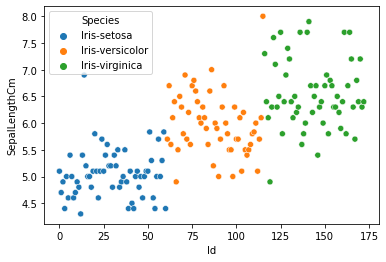

In [19]:
sns.scatterplot(data=data_iris, x="Id",y="SepalLengthCm",hue="Species")

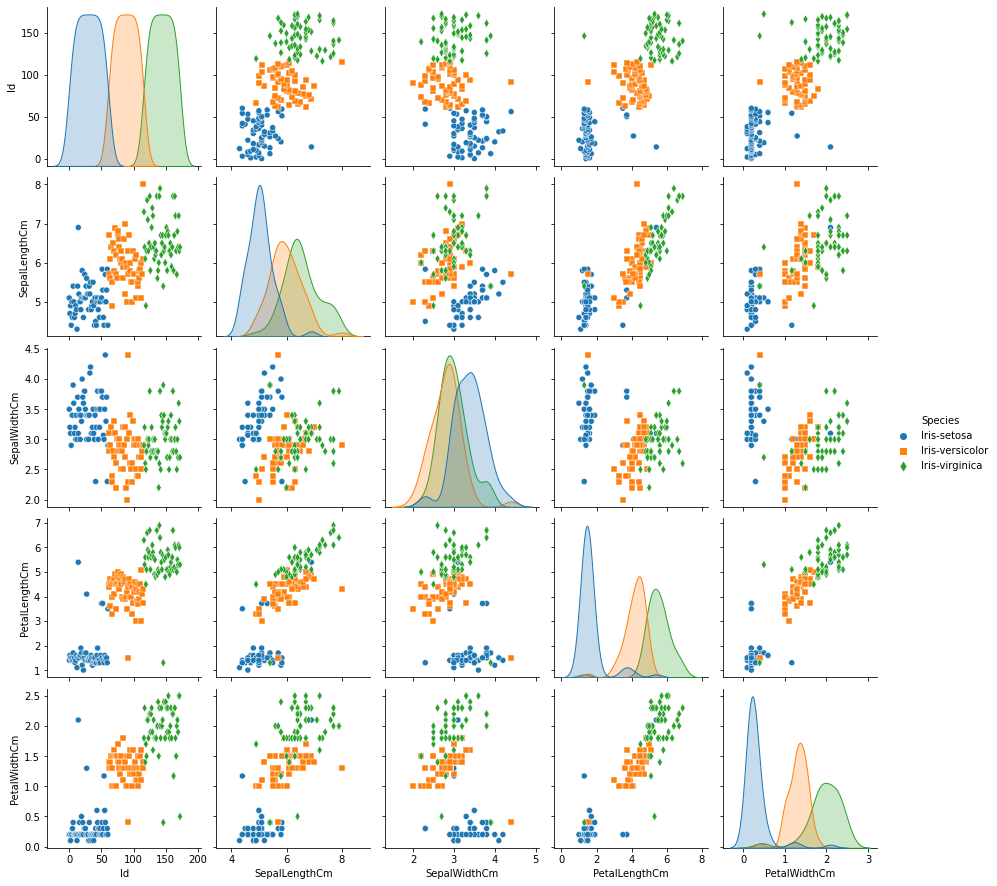

In [20]:
sns.pairplot(data = data_iris, hue="Species", markers=["o","s","d"]);

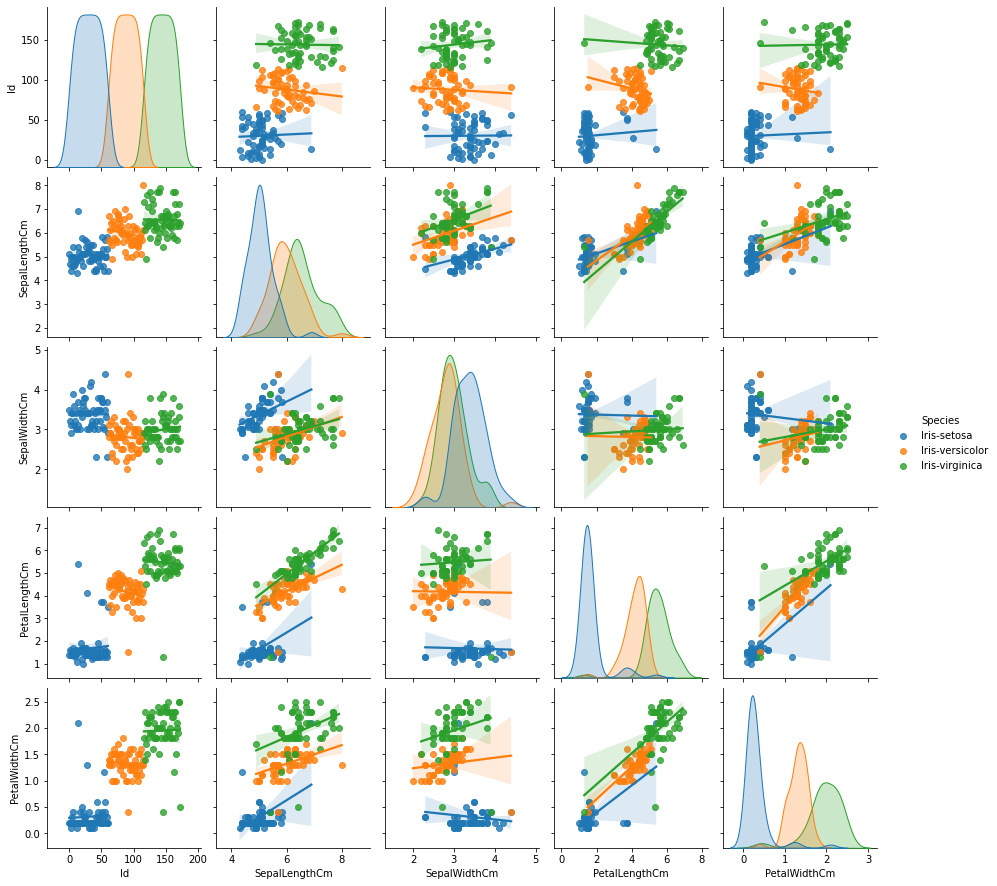

In [21]:
sns.pairplot(data = data_iris, kind="reg", hue="Species");

Outlier Detection¶

In [33]:
data_iris.shape


(161, 6)

https://www.kaggle.com/code/gizemaydn/learning-data-science-with-iris-and-its-outliers/notebook

In [28]:
for column in data_iris.columns[1:-1]:
    for specy in data_iris["Species"].unique():
        Specy_type=data_iris[data_iris["Species"]==specy]
        Selected_column=Specy_type[column]
        avg = Selected_column.mean()
        std = Selected_column.std()
        upper_lmt = avg + (3 * std) 
        lower_lmt= avg - (3 * std)
        outliers=Selected_column[((Selected_column > upper_lmt) | (Selected_column< lower_lmt))].index # picking outliers' indeces
        data_iris.drop(index=outliers, inplace=True) # dropping outliers
        print(column,specy,outliers)

SepalLengthCm Iris-setosa Int64Index([], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([], dtype='int64')


In [27]:
for column in data_iris.columns[1:-1]:
    for specy in data_iris["Species"].unique():
        Specy_type=data_iris[data_iris["Species"]==specy]
        Selected_column=Specy_type[column]
        avg = Selected_column.mean()
        std = Selected_column.std()
        upper_lmt = avg + (3 * std) 
        lower_lmt= avg - (3 * std)
        #print(upper_lmt)
        #print(lower_lmt)*
        outliers=Selected_column[((Selected_column > upper_lmt) | (Selected_column< lower_lmt))].index # picking outliers' indeces
        data_iris.drop(index=outliers, inplace=True) # dropping outliers
        print(column,specy,outliers)

SepalLengthCm Iris-setosa Int64Index([], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([], dtype='int64')


In [29]:
data_iris.to_csv("updated_data.csv")

In [35]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 171
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             161 non-null    int64  
 1   SepalLengthCm  161 non-null    float64
 2   SepalWidthCm   161 non-null    float64
 3   PetalLengthCm  161 non-null    float64
 4   PetalWidthCm   161 non-null    float64
 5   Species        161 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 12.9+ KB


In [36]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [37]:
import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [38]:
data = pd.read_csv('/content/drive/MyDrive/ADSExperiments/updated_data.csv')
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     154 non-null    int64  
 1   Id             154 non-null    int64  
 2   SepalLengthCm  154 non-null    float64
 3   SepalWidthCm   154 non-null    float64
 4   PetalLengthCm  154 non-null    float64
 5   PetalWidthCm   154 non-null    float64
 6   Species        154 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.5+ KB


In [42]:
data.drop(data.columns[0:2], axis=1, inplace=True)
data.head()
print("dropped columns")

dropped columns


In [43]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


In [44]:
labenc= LabelEncoder()
data["Species"] = labenc.fit_transform(data["Species"]) # transforming Species column into label encoding format

In [45]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.7,3.2,1.6,0.2,0
2,4.9,3.1,1.5,0.1,0
3,4.4,2.9,1.4,0.2,0
4,5.0,3.4,1.5,0.2,0


In [ ]:
data

In [47]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [48]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [49]:
from sklearn.model_selection import train_test_split

In [53]:
x_train , x_test , y_train , y_test = train_test_split( data.iloc[:,0:-1] , data.iloc[:,-1] , test_size=0.2 )

In [50]:
import xgboost as xgb 

In [51]:
xgb_clsfr = xgb.XGBClassifier(objective="multiclass:softmax", num_class=3)

In [54]:
xgb_clsfr.fit(x_train,y_train)

XGBClassifier(num_class=3, objective='multi:softprob')

In [55]:
predictions = xgb_clsfr.predict(x_test)
predictions

array([2, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0,
       0, 2, 2, 1, 1, 2, 1, 1, 1])

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
accuracy_score(y_test, predictions)

0.967741935483871

In [58]:
confusion_matrix(y_test,predictions)

array([[ 9,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  9]])

# Data description

In [ ]:
print("Shape of the data frame: ",df.shape)
print("Total null values: ",df.isna().sum().sum())
print("Duplicate values: ",df.duplicated().sum() )

Shape of the data frame:  (150, 6)
Total null values:  0
Duplicate values:  0


In [ ]:
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [ ]:
df.kurtosis()

Id              -1.200000
SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

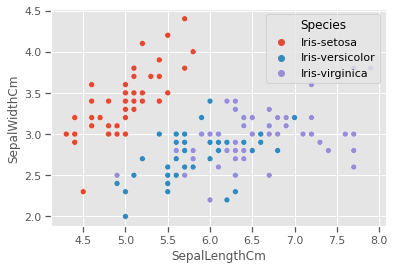

In [ ]:
sns.scatterplot(x= "SepalLengthCm",y= "SepalWidthCm",
              hue="Species",
              data=df);

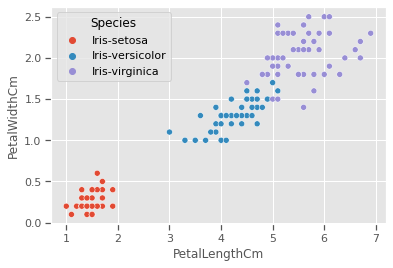

In [ ]:
sns.scatterplot(x= "PetalLengthCm" ,y= "PetalWidthCm",
              hue="Species",
              data=df);

# Univariate visualization

# Box plot/Quartile

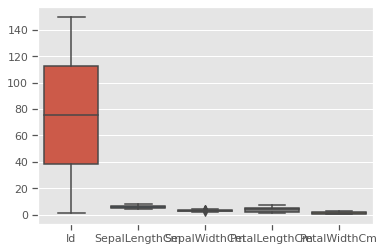

In [ ]:

sns.boxplot(data=df)

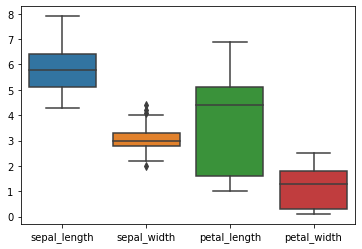

observation

from the above box plot it's clear

sepal_width has outliers and it's right skewed

petal_length and petal_with are left skewed

sepal_length is symmetrical






# Comparison between the 3 categories for each numerical variable.

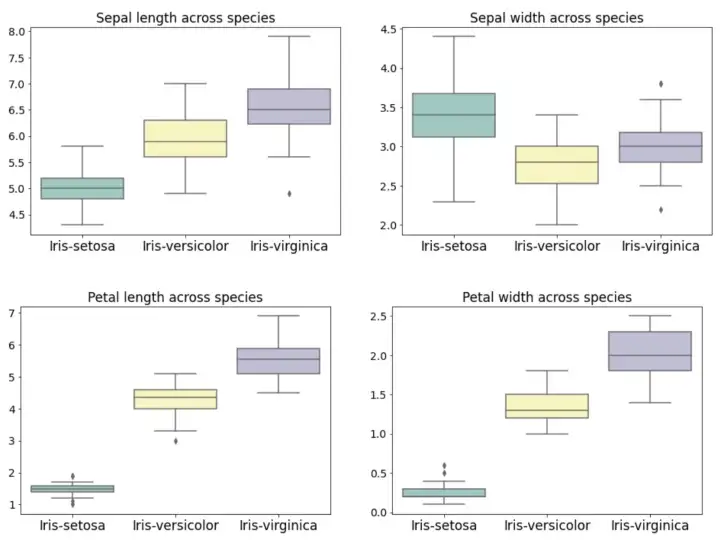

We should be able to read the summary statistics (median, quartiles, IQR, maximum and minimum) from the above plots. Iris virginica is larger and wider than all other species except for the sepal width. There is an outlier for Iris virginica sepal length near 5 cm.

# Comparison between the 4 numeric variables for each category.

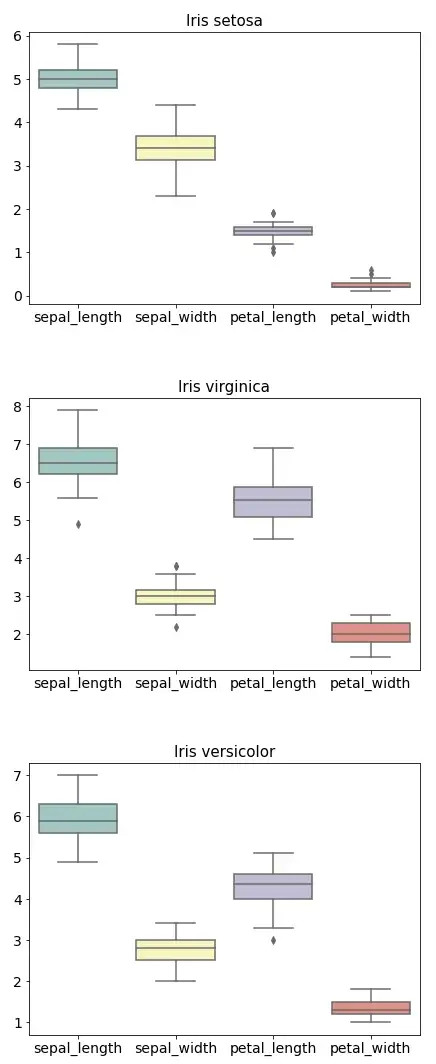

observation


For Iris setosa, the petal lengths are smaller than the sepal widths.

Box plots can also help us to identify skewed data (we will discuss that with the next plot).

In [ ]:
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

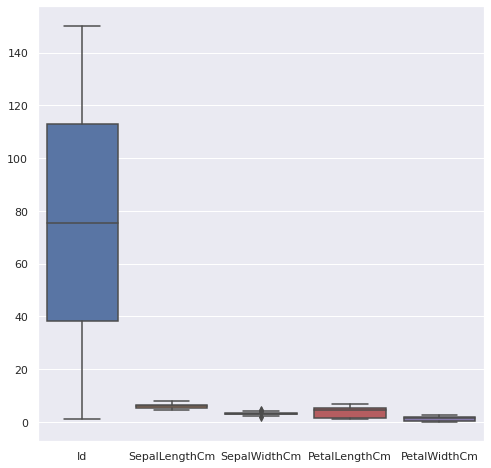

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(data=df)

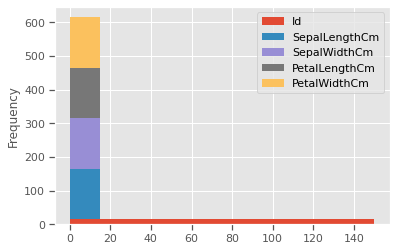

In [ ]:
df.plot.hist(stacked=True,by='species')
plt.show()

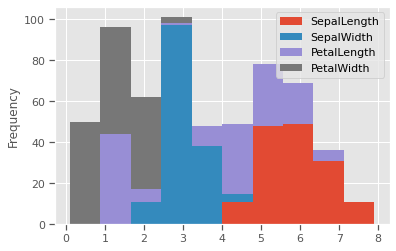

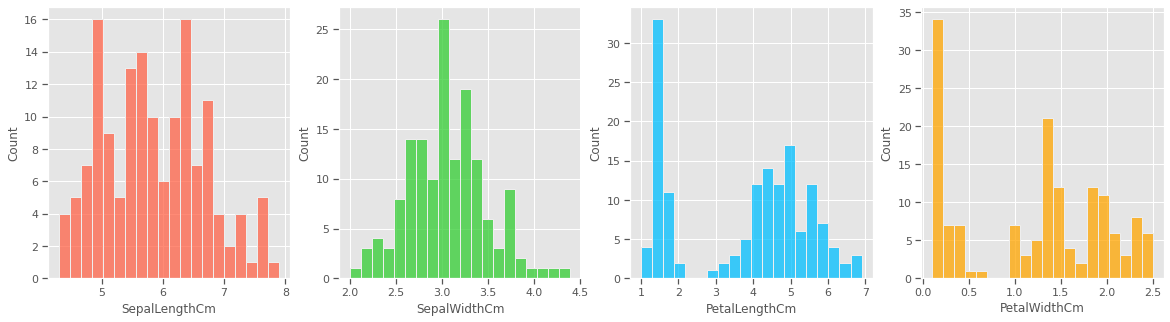

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))
sns.histplot(df['SepalLengthCm'], ax=ax[0], bins=20, color='tomato')
sns.histplot(df['SepalWidthCm'], ax=ax[1], bins=20, color='limegreen')
sns.histplot(df['PetalLengthCm'], ax=ax[2], bins=20, color='deepskyblue')
sns.histplot(df['PetalWidthCm'], ax=ax[3], bins=20, color='orange');

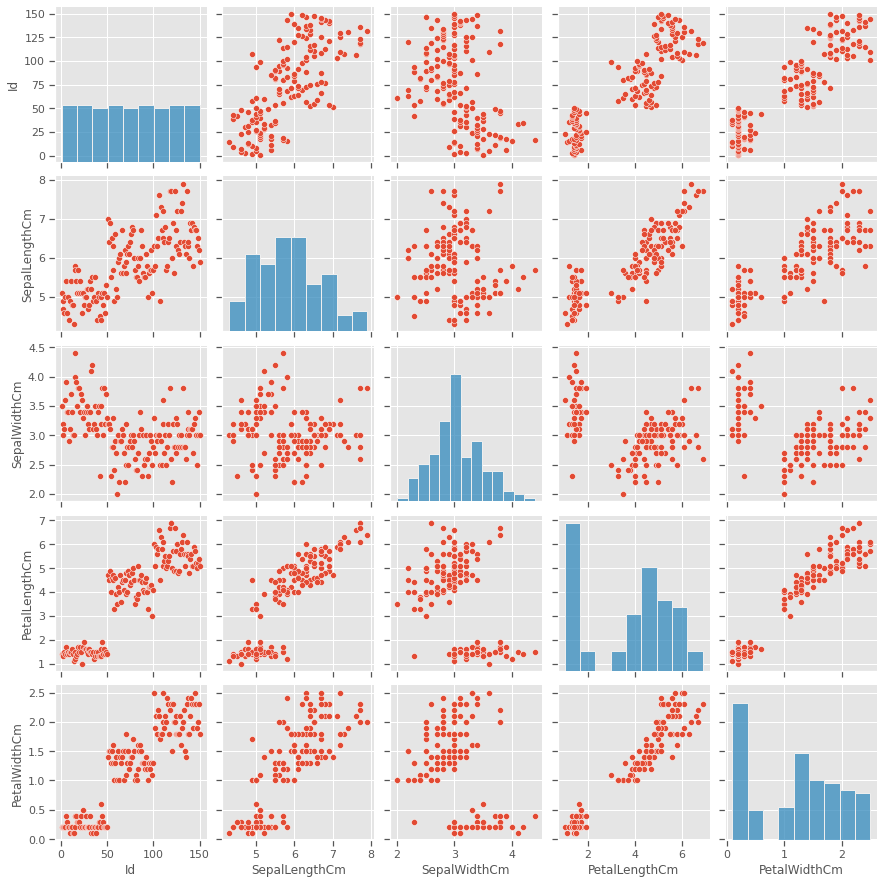

In [ ]:
sns.pairplot(df)


In [ ]:
sns.hist(df.SepalLengthCm , xlab="Sepal Length", main="Histogram of Sepal Length");
hist

NameError: ignored

In [ ]:
sns.histplot(df['SepalLengthCm'], ax=ax[0], bins=20, color='tomato')

NameError: ignored

In [ ]:
ggplot(df.PetalLengthCm, aes(x = PetalLengthCm, fill = Species)) + 
  geom_histogram(alpha = 0.75, position = "identity") +
  labs(title = "Petal length for different species shown on a histogram", x = "Petal Length", y = "Frequency") + 
  theme_minimal()

SyntaxError: ignored